In [88]:
import numpy as np 
import torch 
import torch.nn as nn
import gym 
import random
import matplotlib.pyplot as plt
from torch.autograd import Variable

from Visualisation import render_averages_plot, render_plot_with_hist
from SingleReplay import DQN

In [98]:
class ER(DQN):
    
     def update(self, state, y):
        y_pred = self.nn(torch.Tensor(state))
        loss = self.loss(y_pred, Variable(torch.Tensor(y)))
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    def predict(self, state):
        with torch.no_grad():
            return self.nn(torch.Tensor(state))
    

    def replay(self, memory, size, gamma):
        if len(memory) >= size:
            states = []
            targets = []

            batch = random.sample(memory, size)

            for experience in batch:
                state, action, next_state, reward, done = experience
                states.append(state)
                q_vals = self.predict(state).tolist()
                if done:
                    q_vals[action] = reward
                else: 
                    q_vals_next = self.predict(next_state)
                    q_vals[action] = reward + gamma * torch.max(q_vals_next).item()
                targets.append(q_vals)
            self.update(states, targets)
            

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

In [83]:

def train(env, model, episodes, gamma, epsilon, decay, mem_size):
    final_reward = []
    memory = []
    exp = []
    avg_loss_episode = []
    
    goal_achieved = 0
    episode_num = 0

    for _ in range(episodes):
        ep_loss = []
        episode_num += 1

        state = env.reset()
        done = False
        total = 0

        while not done:
        
            q_values = model.predict(state)

            if np.random.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = torch.argmax(q_values).item()
                

            next_state, reward, done, _ = env.step(action)
            # print(next_state)
            # print(action, q_values)
            # print(next_state[2])
            # if -0.05 < next_state[2] < 0.05:
            #     if -0.5 < next_state[0] < 0.5:
            #         reward *= 1.2
            #     else:
            #         reward *= 1.1
            # env.render()
            total += reward

        
            memory.append((state, action, next_state, reward, done))
            # if 25 is a list, this doesnt need to be computed again
            model.predict(state).tolist()
            loss = model.replay(memory, mem_size, gamma)
            ep_loss.append(loss)
            state = next_state

        epsilon = max(epsilon * decay, 0.01)
        # avg_loss = np.mean(ep_loss)
        # avg_loss_episode.append(avg_loss)
        final_reward.append(total)
        if total >= 200:
            goal_achieved += 1
        
            # print(goal_achieved)
    return final_reward, goal_achieved

In [84]:
def average(runs, env, episodes):
    all_rewards = []
    successes = []

    for x in range(runs):
        print(x)
        model = ER(obs_dim, action_dim, lr)
        rewards, goals = train(env, model, episodes, gamma, epsilon, decay, 10)
        all_rewards.append(rewards)
        successes.append(goals)

    rewards_array = np.array([np.array(i) for i in all_rewards])
    return rewards_array, successes

In [85]:
episodes = 150
lr = 0.001

gamma = 0.9
epsilon = 0.4
decay = 0.99
UPDATE = 10



In [86]:
env = gym.make("CartPole-v1")
obs_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
model = ER(obs_dim, action_dim, lr)

In [87]:

           
loss = train(env, model, episodes, gamma, epsilon, decay, 10)

%store rewards
%store goals


TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [8]:
%store -r rewards
%store -r goals

In [19]:
print(goals)

61


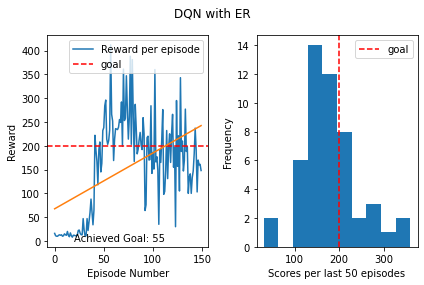

In [17]:
render_plot_with_hist(range(episodes), rewards, goals, "DQN with ER", True, "ERHist")

In [22]:
rewards_runs, goals_runs = average(10, env, episodes)

%store rewards_runs
%store goals_runs

0
1
2
3
4
5
6
7
8
9
Stored 'rewards_runs' (ndarray)
Stored 'goals_runs' (list)


In [23]:
%store -r rewards_runs
%store -r goals_runs
print(np.mean(goals_runs))
print(goals_runs)

70.1
[87, 83, 64, 50, 61, 92, 77, 46, 72, 69]


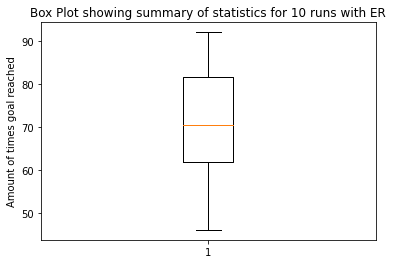

In [24]:
    plt.boxplot(goals_runs, meanline=True)
    plt.title("Box Plot showing summary of statistics for 10 runs with ER")
    plt.ylabel("Amount of times goal reached")
    plt.show()

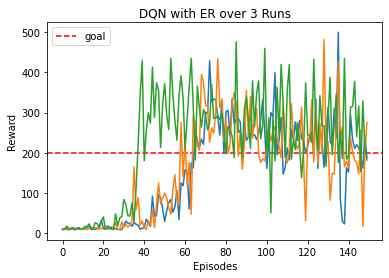

In [11]:
render_averages_plot(range(episodes), rewards_runs, "DQN with ER over 3 Runs", "ER3")

In [15]:
acheiveds = {}
for epsilon in [0.3, 0.4, 0.5, 0.6, 0.7]:
    print(epsilon)
    model = ER(obs_dim, action_dim, lr)
    _, achieved, epsilons, exp = train(env, model, episodes, gamma, epsilon, decay, 10)
    explore = exp.count("explore")
    exploit = exp.count("exploit")
    acheiveds[epsilon] = (achieved, epsilons, explore, exploit)
%store acheiveds
print(acheiveds)




    

0.3
Episode number: 1 Reward: 12.0
Episode number: 2 Reward: 10.0
Episode number: 3 Reward: 11.0
Episode number: 4 Reward: 9.0
Episode number: 5 Reward: 11.0
Episode number: 6 Reward: 8.0
Episode number: 7 Reward: 9.0
Episode number: 8 Reward: 11.0
Episode number: 9 Reward: 9.0
Episode number: 10 Reward: 9.0
Episode number: 11 Reward: 12.0
Episode number: 12 Reward: 10.0
Episode number: 13 Reward: 9.0
Episode number: 14 Reward: 13.0
Episode number: 15 Reward: 9.0
Episode number: 16 Reward: 13.0
Episode number: 17 Reward: 11.0
Episode number: 18 Reward: 12.0
Episode number: 19 Reward: 11.0
Episode number: 20 Reward: 10.0
Episode number: 21 Reward: 10.0
Episode number: 22 Reward: 12.0
Episode number: 23 Reward: 10.0
Episode number: 24 Reward: 15.0
Episode number: 25 Reward: 15.0
Episode number: 26 Reward: 16.0
Episode number: 27 Reward: 30.0
Episode number: 28 Reward: 17.0
Episode number: 29 Reward: 15.0
Episode number: 30 Reward: 10.0
Episode number: 31 Reward: 28.0
Episode number: 32 R

KeyboardInterrupt: 

In [14]:
x = range(len(acheiveds))
y = []
bar = []
exp = []
for key in acheiveds.keys():
    y.append(acheiveds[key][1])
    bar.append(acheiveds[key][0])
    exp.append((acheiveds[key][2], acheiveds[key][3]))
    
    
for i in range(len(y)):
    plt.plot(y[i])

plt.xlabel("Episodes")
plt.ylabel("Value of Epsilon")
plt.title("Rate of decay for different starting values of $\epsilon$")
plt.show()





NameError: name 'acheiveds' is not defined

In [79]:
print(bar)
print(acheiveds.keys())

[65, 91, 72, 71, 55]
dict_keys([0.3, 0.4, 0.5, 0.6, 0.7])


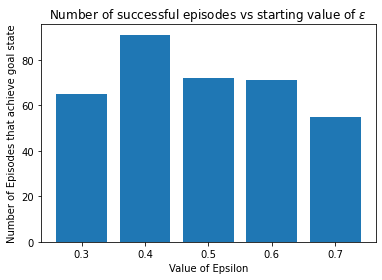

In [127]:
x_pos = [0, 1, 2, 3, 4]
plt.bar(x_pos, bar)
plt.xticks(x_pos, acheiveds.keys())
plt.xlabel("Value of Epsilon")
plt.ylabel("Number of Episodes that achieve goal state")
plt.title("Number of successful episodes vs starting value of $\epsilon$")
plt.show()


In [90]:
print(exp)

[(2840, 21549), (5466, 26717), (5175, 21457), (6262, 19343), (6438, 16001)]


In [13]:
explores = []
exploits = []

for i in range(len(exp)):
    explore, exploit = exp[i]
    explores.append(explore)
    exploits.append(exploit)

    
fig =plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(len(acheiveds.keys()))


ax.bar(X + 0.00, explores, color = 'b', width = 0.25, label="explore")
ax.bar(X + 0.25, exploits, color = 'r', width = 0.25, label="exploit")
plt.xticks(x_pos, acheiveds.keys())
plt.xlabel("Starting value of $\epsilon$")
plt.ylabel("Number of times agents explores/exploits")
plt.title("Bar chart of number of times agent explores/exploits for different starting values of $\epsilon$")
plt.show()

np.divide(exploits, explores)

NameError: name 'exp' is not defined

In [139]:
for x in exp:
    total = sum(x)
    print(x[0]/total, x[1]/total)

0.11644593874287588 0.8835540612571241
0.16984122052015038 0.8301587794798496
0.1943151096425353 0.8056848903574647
0.24456160906073032 0.7554383909392697
0.2869111814251972 0.7130888185748028


In [159]:
goals = {}
for mem in [5, 10, 15, 20, 25, 30]:
    print(mem)
    model = ER(obs_dim, action_dim, lr)
    _, achieved, _, _ = train(env, model, episodes, gamma, 0.4, decay, mem)
    goals[mem] = achieved

5
Episode number: 1 Reward: 14.0
Episode number: 2 Reward: 9.0
Episode number: 3 Reward: 15.0
Episode number: 4 Reward: 9.0
Episode number: 5 Reward: 9.0
Episode number: 6 Reward: 10.0
Episode number: 7 Reward: 9.0
Episode number: 8 Reward: 10.0
Episode number: 9 Reward: 13.0
Episode number: 10 Reward: 9.0
Episode number: 11 Reward: 11.0
Episode number: 12 Reward: 16.0
Episode number: 13 Reward: 10.0
Episode number: 14 Reward: 10.0
Episode number: 15 Reward: 12.0
Episode number: 16 Reward: 10.0
Episode number: 17 Reward: 11.0
Episode number: 18 Reward: 16.0
Episode number: 19 Reward: 20.0
Episode number: 20 Reward: 13.0
Episode number: 21 Reward: 29.0
Episode number: 22 Reward: 12.0
Episode number: 23 Reward: 18.0
Episode number: 24 Reward: 18.0
Episode number: 25 Reward: 8.0
Episode number: 26 Reward: 9.0
Episode number: 27 Reward: 12.0
Episode number: 28 Reward: 11.0
Episode number: 29 Reward: 9.0
Episode number: 30 Reward: 16.0
Episode number: 31 Reward: 26.0
Episode number: 32 Rewa

In [162]:
print(goals)

{5: 63, 10: 64, 15: 73, 20: 75, 25: 51, 30: 46}


[63, 64, 73, 75, 51, 46]
[0 1 2 3 4 5]


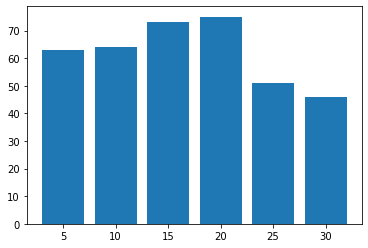

In [163]:
x = np.arange(len(goals.keys()))
successes = []

for key in goals.keys():
    successes.append(goals[key])
    
print(successes)
print(x)
plt.xticks(x, goals.keys())
plt.bar(x, successes)
plt.show()    

